In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sns
%matplotlib inline

In [3]:
%load_ext watermark
%watermark -a 'Rohit Hebbar' -u -d -v -p numpy,pandas,matplotlib

Author: Rohit Hebbar

Last updated: 2021-03-31

Python implementation: CPython
Python version       : 3.8.2
IPython version      : 7.18.1

numpy     : 1.19.5
pandas    : 1.2.0
matplotlib: 3.3.3



In [43]:
class LogisticRegression(object):
    """
    LogisticRegression classifier.

    Parameters
    ------------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset.

    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    cost_ : list
        Cost in every epoch.

    """
    def __init__(self,lr = 0.01, n_iter = 50):
        self.lr = lr
        self.n_iter = n_iter
    
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X : {array-like}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        y : array-like, shape = [n_samples]
            Target values.

        Returns
        -------
        self : object

        """
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        for i in range(self.n_iter):
            y_val = self.activation(X)
            errors_ = (y - y_val)
            neg_grad = X.T.dot(errors_)
            self.w_[1:] += self.lr * neg_grad
            self.w_[0] += self.lr * errors_.sum()
            self.errors_.append(self._logit_cost(y,self.activation(X)))
        return self
    
    def _logit_cost(self, y, y_val):
        logit = -y.dot(np.log(y_val)) - ((1- y).dot(np.log(1 - y_val)))
        return logit
    
    def _sigmoid(self, z):
        return 1.0/(1.0 + np.exp(-z))
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """ Activate the logistic neuron"""
        z = self.net_input(X)
        return self._sigmoid(z)
    
    def predict_prob(self, X):
        """
        Predict class probabilities for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        
        Returns
        ----------
          Class 1 probability : float
        
        """
        return activation(X)
    
    def predict(self, X):
        """
        Predict class labels for X.
        
        Parameters
        ----------
        X : {array-like, sparse matrix}, shape = [n_samples, n_features]
            Training vectors, where n_samples is the number of samples and
            n_features is the number of features.
        
        Returns
        ----------
        class : int
            Predicted class label.
        
        """
        return np.where(self.net_input(X) >= 0.0, 1, 0)

In [44]:
# Reading IRIS dataset
df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header=None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [45]:
# select setosa and versicolor
y = df.iloc[0:100, 4].values
#print(y)
y = np.where(y == 'Iris-setosa', 1, 0)
#print(y)
# Extract the petal length and sepal length
x = df.iloc[0:100,[0,2]].values
# standardize features
x_std = np.copy(x)
x_std[:,0] = (x[:,0] - x[:,0].mean()) / x[:, 0].std()
x_std[:,1] = (x[:,1] - x[:,1].mean()) / x[:, 1].std()

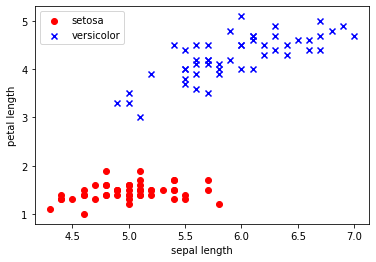

In [46]:
plt.scatter(x[:50,0],x[:50, 1], color='red',marker='o',label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color = 'blue', marker='x', label='versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.show()

In [49]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=cmap(idx),
                    marker=markers[idx], label=cl)

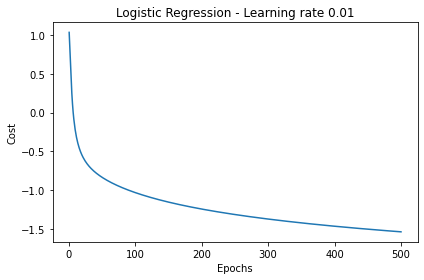

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

lr = LogisticRegression(n_iter=500, lr=0.2).fit(x_std, y)
plt.plot(range(1, len(lr.errors_) + 1), np.log10(lr.errors_))
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Logistic Regression - Learning rate 0.01')

plt.tight_layout()
plt.show()


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


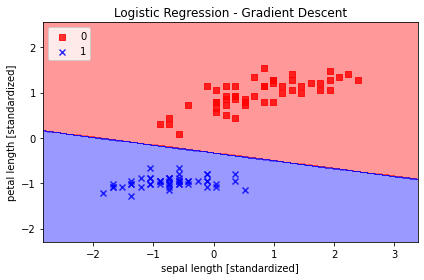

In [55]:
plot_decision_regions(x_std, y, classifier=lr)
plt.title('Logistic Regression - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
